In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [6]:
X = dataset[:,0:10]

In [7]:
Y = dataset[:,10]

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

/home/shivamkapila/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [13]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [15]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [16]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

W0708 17:47:11.357988 140389280286528 deprecation_wrapper.py:119] From /home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 17:47:11.385557 140389280286528 deprecation_wrapper.py:119] From /home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 17:47:11.388155 140389280286528 deprecation_wrapper.py:119] From /home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [17]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

W0708 17:49:07.242588 140389280286528 deprecation_wrapper.py:119] From /home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0708 17:49:07.310913 140389280286528 deprecation_wrapper.py:119] From /home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0708 17:49:07.319783 140389280286528 deprecation.py:323] From /home/shivamkapila/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

W0708 17:49:57.388557 140389280286528 deprecation_wrapper.py:119] From /home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 236us/step - loss: 0.7172 - acc: 0.5059 - val_loss: 0.7137 - val_acc: 0.4703
Epoch 2/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.6954 - acc: 0.5078 - val_loss: 0.6923 - val_acc: 0.5251
Epoch 3/100
1022/1022 [==============================] - 0s 40us/step - loss: 0.6829 - acc: 0.6585 - val_loss: 0.6792 - val_acc: 0.6849
Epoch 4/100
1022/1022 [==============================] - 0s 34us/step - loss: 0.6741 - acc: 0.7622 - val_loss: 0.6690 - val_acc: 0.7397
Epoch 5/100
1022/1022 [==============================] - 0s 37us/step - loss: 0.6668 - acc: 0.7055 - val_loss: 0.6609 - val_acc: 0.7169
Epoch 6/100
1022/1022 [==============================] - 0s 41us/step - loss: 0.6605 - acc: 0.6840 - val_loss: 0.6540 - val_acc: 0.7215
Epoch 7/100
1022/1022 [==============================] - 0s 35us/step - loss: 0.6543 - acc: 0.7270 - val_loss: 0.6471 - val_acc: 0.7397


1022/1022 [==============================] - 0s 39us/step - loss: 0.3142 - acc: 0.8718 - val_loss: 0.2800 - val_acc: 0.8995
Epoch 61/100
1022/1022 [==============================] - 0s 35us/step - loss: 0.3122 - acc: 0.8757 - val_loss: 0.2776 - val_acc: 0.8995
Epoch 62/100
1022/1022 [==============================] - 0s 35us/step - loss: 0.3109 - acc: 0.8708 - val_loss: 0.2765 - val_acc: 0.9087
Epoch 63/100
1022/1022 [==============================] - 0s 37us/step - loss: 0.3091 - acc: 0.8718 - val_loss: 0.2755 - val_acc: 0.9087
Epoch 64/100
1022/1022 [==============================] - 0s 38us/step - loss: 0.3076 - acc: 0.8728 - val_loss: 0.2723 - val_acc: 0.9087
Epoch 65/100
1022/1022 [==============================] - 0s 36us/step - loss: 0.3060 - acc: 0.8728 - val_loss: 0.2710 - val_acc: 0.9087
Epoch 66/100
1022/1022 [==============================] - 0s 44us/step - loss: 0.3047 - acc: 0.8738 - val_loss: 0.2684 - val_acc: 0.8995
Epoch 67/100
1022/1022 [==============================

In [19]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 25us/step


0.8858447504914515

In [20]:
import matplotlib.pyplot as plt

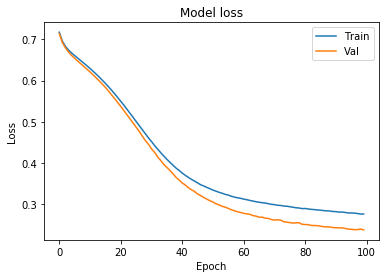

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

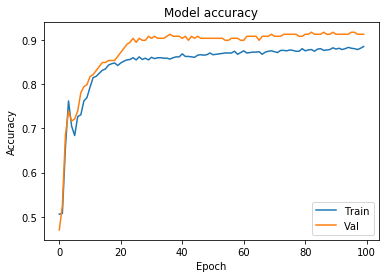

In [23]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [24]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4858 - acc: 0.7691 - val_loss: 0.3219 - val_acc: 0.8813
Epoch 2/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.3708 - acc: 0.8523 - val_loss: 0.3577 - val_acc: 0.8356
Epoch 3/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.3382 - acc: 0.8601 - val_loss: 0.3202 - val_acc: 0.8493
Epoch 4/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.3060 - acc: 0.8738 - val_loss: 0.2931 - val_acc: 0.8858
Epoch 5/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2939 - acc: 0.8718 - val_loss: 0.2271 - val_acc: 0.8995
Epoch 6/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2610 - acc: 0.8875 - val_loss: 0.2140 - val_acc: 0.9041
Epoch 7/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2699 - acc: 0.8914 - val_loss: 0.3093 - val_acc: 0.8904
Epoch 8/

Epoch 61/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1383 - acc: 0.9432 - val_loss: 0.4110 - val_acc: 0.8995
Epoch 62/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1550 - acc: 0.9354 - val_loss: 0.2761 - val_acc: 0.8904
Epoch 63/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1504 - acc: 0.9403 - val_loss: 0.3529 - val_acc: 0.8904
Epoch 64/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1776 - acc: 0.9354 - val_loss: 0.3803 - val_acc: 0.8676
Epoch 65/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1995 - acc: 0.9266 - val_loss: 0.3504 - val_acc: 0.9041
Epoch 66/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1603 - acc: 0.9384 - val_loss: 0.3006 - val_acc: 0.9041
Epoch 67/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1402 - acc: 0.9442 - val_loss: 0.3406 - val_acc: 0.8950
Epoch 68/100
1022/1022 [========================

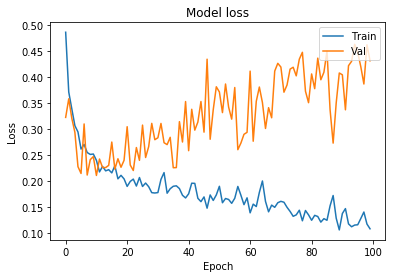

In [25]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

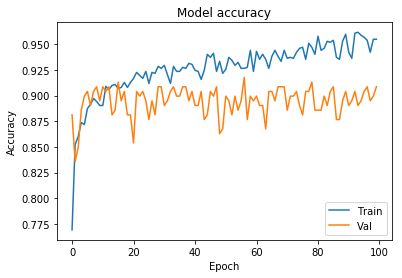

In [26]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [27]:
from keras.layers import Dropout
from keras import regularizers

In [28]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

W0708 17:57:28.729215 140389280286528 deprecation.py:506] From /home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [29]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 14.7202 - acc: 0.7016 - val_loss: 4.0271 - val_acc: 0.7945
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 1.7134 - acc: 0.8317 - val_loss: 0.6118 - val_acc: 0.9041
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5825 - acc: 0.8523 - val_loss: 0.4778 - val_acc: 0.8904
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5172 - acc: 0.8620 - val_loss: 0.4464 - val_acc: 0.9087
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4917 - acc: 0.8679 - val_loss: 0.4289 - val_acc: 0.9178
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4921 - acc: 0.8581 - val_loss: 0.4331 - val_acc: 0.9087
Epoch 7/100
1022/1022 [==============================] - 2s 1ms/step - loss: 0.4760 - acc: 0.8699 - val_loss: 0.4271 - val_acc: 0.9132
Epoch 8

Epoch 61/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4533 - acc: 0.8777 - val_loss: 0.4542 - val_acc: 0.8721
Epoch 62/100
1022/1022 [==============================] - 2s 1ms/step - loss: 0.4489 - acc: 0.8699 - val_loss: 0.3881 - val_acc: 0.9087
Epoch 63/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4219 - acc: 0.8904 - val_loss: 0.3922 - val_acc: 0.9041
Epoch 64/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4277 - acc: 0.8748 - val_loss: 0.3924 - val_acc: 0.8995
Epoch 65/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4332 - acc: 0.8836 - val_loss: 0.4534 - val_acc: 0.8630
Epoch 66/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4456 - acc: 0.8679 - val_loss: 0.3919 - val_acc: 0.9087
Epoch 67/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4373 - acc: 0.8767 - val_loss: 0.3841 - val_acc: 0.9132
Epoch 68/100
1022/1022 [========================